In [21]:
import pandas as pd
import sys
sys.path.insert(0, '..')
from utility import *

import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
DATA_PATH = os.path.join(REPO_ROOT_PATH, 'eds_data/qiagen-bkb-ai-eds-data-slice.tsv')


In [7]:
graph_df = pd.read_csv(DATA_PATH, sep='\t')

In [36]:
graph_df.columns

Index(['Unnamed: 0', 'concept_1_id', 'concept_1_name', 'concept_1_label',
       'concept_2_id', 'concept_2_name', 'concept_2_label', 'source_type',
       'source_name', 'source_id', 'semantic_confidence', 'title', 'section',
       'sentence_no', 'date'],
      dtype='object')

In [92]:
graph_df.head(3)

,Unnamed: 0,concept_1_id,concept_1_name,concept_1_label,concept_2_id,concept_2_name,concept_2_label,source_type,source_name,source_id,semantic_confidence,title,section,sentence_no,date
0,0,EFOHP0004308,Ventricular arrhythmia,Phenotype,MESHD004535,Ehlers-Danlos Syndrome,Disease,Publications,PubMed Central,PMC8298566,0.8,Atrial fibrillation—a complex polygenetic disease,Results and discussion,114,2019-10-30
1,1,MESHD004535,Ehlers-Danlos Syndrome,Disease,MESHD030342,"Genetic Diseases, Inborn",Disease,Grants,NIH Grants,7359669,1.0,Cell-Free Assembly of Organized Collagen Arrays,Abstract,4,2007-03-01
2,2,MESHD003103,Coloboma,Disease,MESHD004535,Ehlers-Danlos Syndrome,Disease,Publications,PubMed Central,PMC9421425,0.8,Case report: Multiple gastrointestinal perfora...,Introduction,3,2022-01-01


In [135]:
graph_df.concept_1_label.unique()

array(['Phenotype', 'Disease', 'Gene', 'CellType', 'Drug',
       'Health Condition'], dtype=object)

In [136]:
graph_df.concept_2_label.unique()

array(['Disease', 'Variant', 'Health Condition', 'Gene', 'Drug',
       'CellType', 'Phenotype'], dtype=object)

In [137]:
graph_df.source_type.unique()

array(['Publications', 'Grants', 'Patents'], dtype=object)

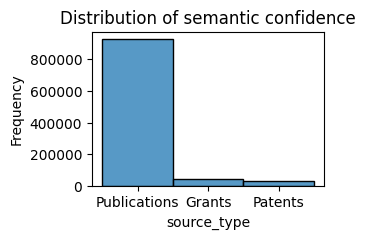

In [189]:


plt.figure(figsize=(3, 2))

sns.histplot(graph_df['source_type'], bins=30, kde=False)

plt.title('Distribution of semantic confidence')
plt.xlabel('source_type')
plt.ylabel('Frequency')

plt.show()


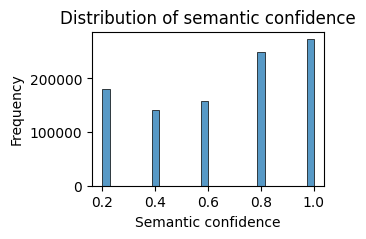

In [32]:


plt.figure(figsize=(3, 2))

sns.histplot(graph_df['semantic_confidence'], bins=30, kde=False)

plt.title('Distribution of semantic confidence')
plt.xlabel('Semantic confidence')
plt.ylabel('Frequency')

plt.show()


In [154]:
graph_df_high_confidence = graph_df[graph_df.semantic_confidence >= 0.8]
graph_df_high_confidence.drop_duplicates(subset=['concept_1_id', 'concept_2_id', 'title'], inplace=True)
graph_df_high_confidence = graph_df_high_confidence[graph_df_high_confidence.section != 'Title']


/var/folders/p1/h56gxdhs5vgb0ztp7h4z606h0000gn/T/ipykernel_62841/2709650902.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  graph_df_high_confidence.drop_duplicates(subset=['concept_1_id', 'concept_2_id', 'title'], inplace=True)


In [156]:
pair_counts = graph_df_high_confidence.groupby(['concept_1_id', 'concept_2_id']).size().reset_index(name='pair count')


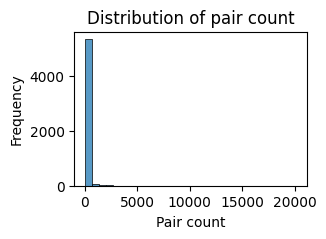

In [157]:


plt.figure(figsize=(3, 2))

sns.histplot(pair_counts['pair count'], bins=30, kde=False)

plt.title('Distribution of pair count')
plt.xlabel('Pair count')
plt.ylabel('Frequency')

plt.show()


In [159]:
print('Min pair count : ', pair_counts['pair count'].min())
print('Max pair count : ', pair_counts['pair count'].max())
print('Mean pair count : ', pair_counts['pair count'].mean())
print('Median pair count : ', pair_counts['pair count'].median())
print('Std pair count : ', pair_counts['pair count'].std())


Min pair count :  1
Max pair count :  20126
Mean pair count :  65.61286764705882
Median pair count :  3.0
Std pair count :  533.2708992056098


In [180]:
pair_counts_selected = pair_counts[pair_counts['pair count'] > 3]


In [181]:
graph_df_high_confidence_pair_selected = pd.merge(graph_df_high_confidence, pair_counts_selected, on=['concept_1_id', 'concept_2_id'])


In [182]:
group_by_columns = [
    'concept_1_id', 'concept_1_name', 'concept_1_label',
    'concept_2_id', 'concept_2_name', 'concept_2_label'
]

graph_df_high_confidence_pair_selected_grouped = graph_df_high_confidence_pair_selected.groupby(group_by_columns).agg({
    'Unnamed: 0': list,
    'source_type': list,
    'source_name': list,
    'source_id': list,
    'semantic_confidence': list,
    'title': list,
    'section': list,
    'sentence_no': list,
    'date': list,
    'pair count': list
}).reset_index()



In [183]:
graph_df_high_confidence_pair_selected_grouped.shape


(2678, 16)

In [184]:
graph_df_high_confidence_pair_selected_grouped[graph_df_high_confidence_pair_selected_grouped.concept_1_name=='Ehlers-Danlos Syndrome']



,concept_1_id,concept_1_name,concept_1_label,concept_2_id,concept_2_name,concept_2_label,Unnamed: 0,source_type,source_name,source_id,semantic_confidence,title,section,sentence_no,date,pair count
2235,MESHD004535,Ehlers-Danlos Syndrome,Disease,MESHD004827,Epilepsy,Disease,"[2916, 4300, 4458, 5796, 7017, 7320, 7979, 121...","[Publications, Publications, Publications, Pub...","[PubMed, PubMed Central, PubMed, PubMed, PubMe...","[10219273, PMC7711487, 36000491, 30961343, 878...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[Epilepsy in Ehlers-Danlos syndrome., The Rela...","[Abstract, 4. Symptom Overlap between Autism a...","[1, 21, 1, 1, 3, 1, 1, 103, 1, 8]","[1999-04-29, 2020-11-12, 2022-06-30, 2019-04-0...","[10, 10, 10, 10, 10, 10, 10, 10, 10, 10]"
2236,MESHD004535,Ehlers-Danlos Syndrome,Disease,MESHD005322,"Fetal Membranes, Premature Rupture",Disease,"[81, 4441, 4807, 7555, 9077, 10445, 10550, 108...","[Publications, Publications, Publications, Pub...","[PubMed Central, PubMed Central, PubMed, PubMe...","[PMC8509074, PMC7098624, 22787447, 18335242, P...","[1.0, 0.8, 0.8, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",[Roles of Two Small Leucine-Rich Proteoglycans...,[3. Distribution and Functions of DCN in the P...,"[46, 21, 1, 2, 12, 47, 5, 5, 9, 1, 2, 1]","[2021-08-27, 2020-01-01, 2012-04-20, 2007-08-1...","[12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12]"
2237,MESHD004535,Ehlers-Danlos Syndrome,Disease,MESHD005352,Fibromuscular Dysplasia,Disease,"[390, 758, 4877, 8121, 8359, 8548, 11690, 13080]","[Publications, Publications, Publications, Pub...","[PubMed Central, PubMed Central, PubMed Centra...","[PMC3804144, PMC9809914, PMC10251557, 30623691...","[0.8, 0.8, 1.0, 1.0, 1.0, 0.8, 0.8, 0.8]",[Spontaneous Neck Hematoma in a Patient with F...,"[3. Discussion, Discussion, Background, Abstra...","[15, 15, 2, 7, 11, 30, 2, 39]","[2013-01-01, 2021-12-19, 2023-01-01, 2019-01-0...","[8, 8, 8, 8, 8, 8, 8, 8]"
2238,MESHD004535,Ehlers-Danlos Syndrome,Disease,MESHD005356,Fibromyalgia,Disease,"[82, 840, 1025, 1895, 2268, 3111, 3245, 3930, ...","[Publications, Publications, Publications, Pub...","[PubMed Central, PubMed Central, PubMed Centra...","[PMC10312239, PMC9911817, PMC6452458, PMC72555...","[0.8, 1.0, 0.8, 1.0, 0.8, 1.0, 1.0, 1.0, 0.8, ...",[A novel method of assessing balance and postu...,"[Introduction, 6. Discussion, DISCUSSION, Disc...","[4, 180, 23, 40, 392, 6, 1, 2, 1, 390, 52, 13,...","[2022-12-31, 2022-01-01, 2018-03-20, 2020-04-0...","[18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 1..."
2239,MESHD004535,Ehlers-Danlos Syndrome,Disease,MESHD005413,Flatfoot,Disease,"[1005, 1547, 8674, 13705]","[Publications, Publications, Publications, Pub...","[PubMed Central, PubMed Central, PubMed Centra...","[PMC8787077, PMC10676730, PMC3464168, PMC10519...","[0.8, 1.0, 1.0, 0.8]",[Ehlers-Danlos Syndrome in the Field of Psychi...,"[Neurodevelopment Disorders and EDS, Introduct...","[5, 32, 51, 9]","[2021-01-01, 2023-08-14, 2012-01-01, 2023-01-01]","[4, 4, 4, 4]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2372,MESHD004535,Ehlers-Danlos Syndrome,Disease,MESHD059352,Musculoskeletal Pain,Disease,"[1060, 3103, 3704, 5457, 7531, 7862, 8974, 105...","[Publications, Publications, Publications, Pub...","[PubMed, PubMed, PubMed Central, PubMed Centra...","[10722718, 37976114, PMC4009270, PMC6305640, P...","[0.8, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.8, ...",[The pro-alpha3(V) collagen chain. Complete pr...,"[Abstract, Abstract, Abstract, DISCUSSION, 1. ...","[6, 1, 1, 1, 12, 1, 66, 19, 8, 28]","[2000-03-18, 2023-06-13, 2014-01-01, 2018-05-2...","[10, 10, 10, 10, 10, 10, 10, 10, 10, 10]"
2373,MESHD004535,Ehlers-Danlos Syndrome,Disease,MESHD060725,Uterine Retroversion,Disease,"[5719, 8660, 8893, 13722]","[Publications, Publications, Publications, Pub...","[PubMed, PubMed Central, PubMed Central, PubMed]","[34453356, PMC3258236, PMC10584354, 8655934]","[0.8, 1.0, 1.0, 1.0]",[Ehlers-Danlos syndrome type IV with a novel C...,"[Abstr

In [185]:
row_index = 2375
graph_df_high_confidence_pair_selected_grouped.iloc[row_index].concept_1_name

'Ehlers-Danlos Syndrome'

In [186]:
graph_df_high_confidence_pair_selected_grouped.iloc[row_index].concept_2_name

'Myalgia'

In [188]:
graph_df_high_confidence_pair_selected_grouped.iloc[row_index].title

['Hypersensitivity of myelinated A-fibers via toll-like receptor 5 promotes mechanical allodynia in tenascin-X-deficient mice associated with Ehlers–Danlos syndrome',
 'Case report: Complex arterial findings in vascular ehlers-danlos syndrome with a novel COL3A1 variant and death at young age',
 'A randomised controlled trial of heavy shoulder strengthening exercise in patients with hypermobility spectrum disorder or hypermobile Ehlers-Danlos syndrome and long-lasting shoulder complaints: study protocol for the Shoulder-MOBILEX study',
 'A novel mutation in COL3A1 associates to vascular Ehlers–Danlos syndrome with predominant musculoskeletal involvement',
 'An Unusual Case of Ehlers-Danlos Syndrome Presenting as Proptosis',
 'Biomarkers for Ehlers-Danlos Syndromes: There Is a Role?',
 'Temporomandibular disorders, bite force and osseous changes of the temporomandibular joints in patients with hypermobile Ehlers‐Danlos syndrome compared to a healthy control group',
 'Pain in Ehlers–Danl